In [2]:
import pandas as pd
pd.set_option('display.max_columns', 50)
# Assuming the dataset is a CSV file
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Renaming the columns to more meaningful names
df.columns = [
    "Gender",
    "Age",
    "Height",
    "Weight",
    "Family_Overweight_History",
    "High_Caloric_Food_Consumption",
    "Vegetable_Consumption_Frequency",
    "Main_Meal_Frequency",
    "Snacking_Habit",
    "Smoking_Habit",
    "Daily_Water_Intake",
    "Calorie_Monitoring_Habit",
    "Physical_Activity_Frequency",
    "Technology_Usage_Time",
    "Alcohol_Consumption_Frequency",
    "Transportation_Mode",
    "Obesity_Level",
]

# Print the renamed dataframe
df.head()

,Gender,Age,Height,Weight,Family_Overweight_History,High_Caloric_Food_Consumption,Vegetable_Consumption_Frequency,Main_Meal_Frequency,Snacking_Habit,Smoking_Habit,Daily_Water_Intake,Calorie_Monitoring_Habit,Physical_Activity_Frequency,Technology_Usage_Time,Alcohol_Consumption_Frequency,Transportation_Mode,Obesity_Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df["Obesity_Level"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

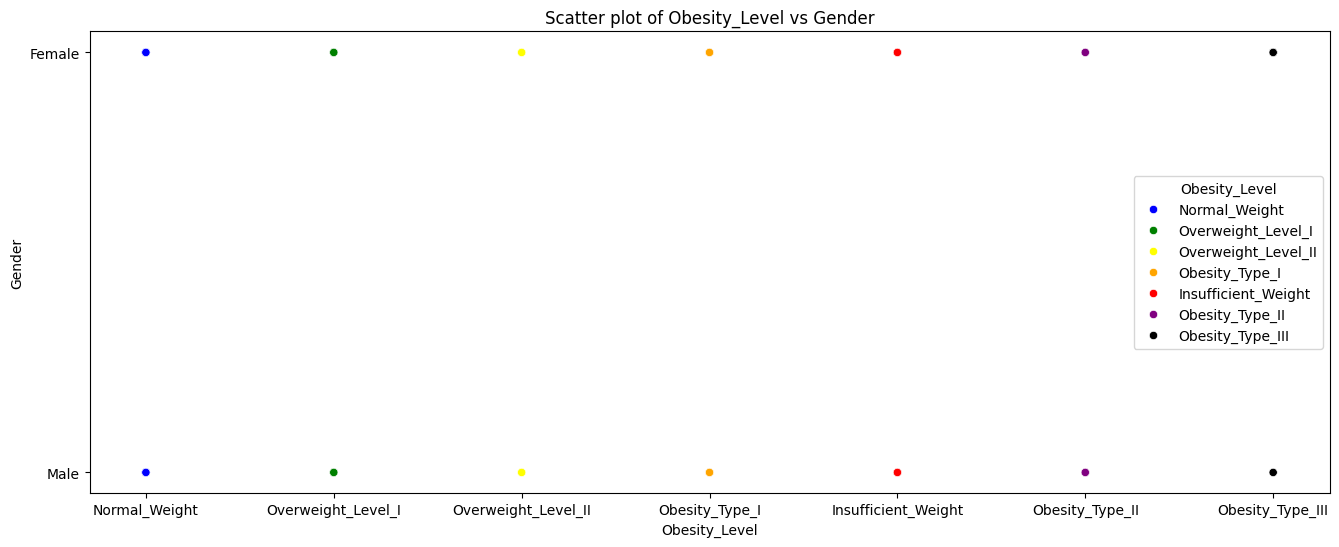

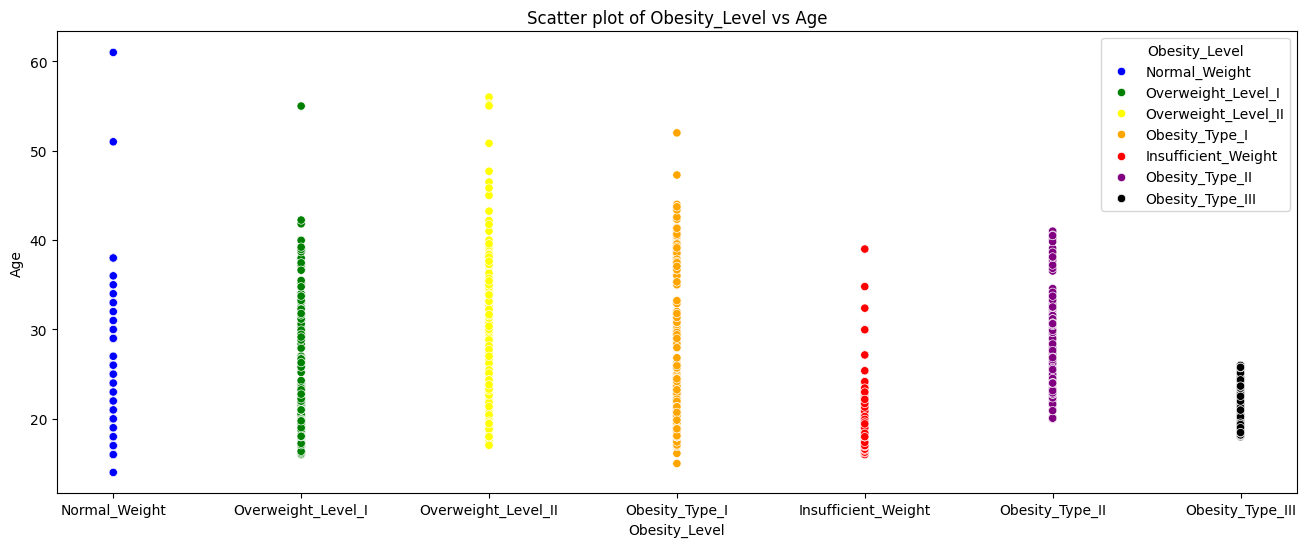

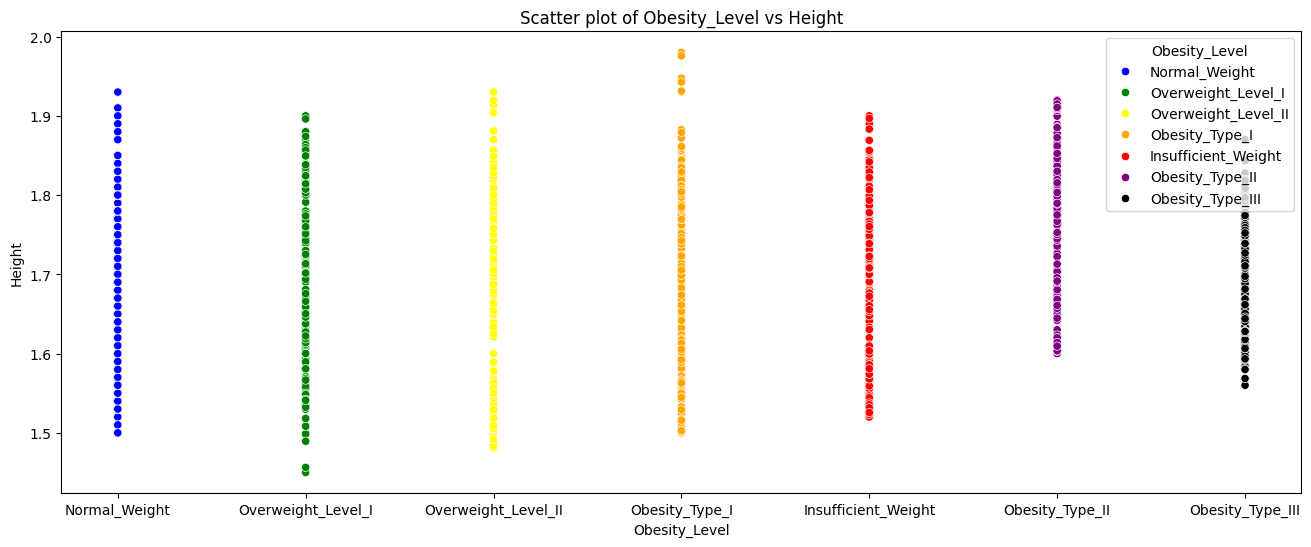

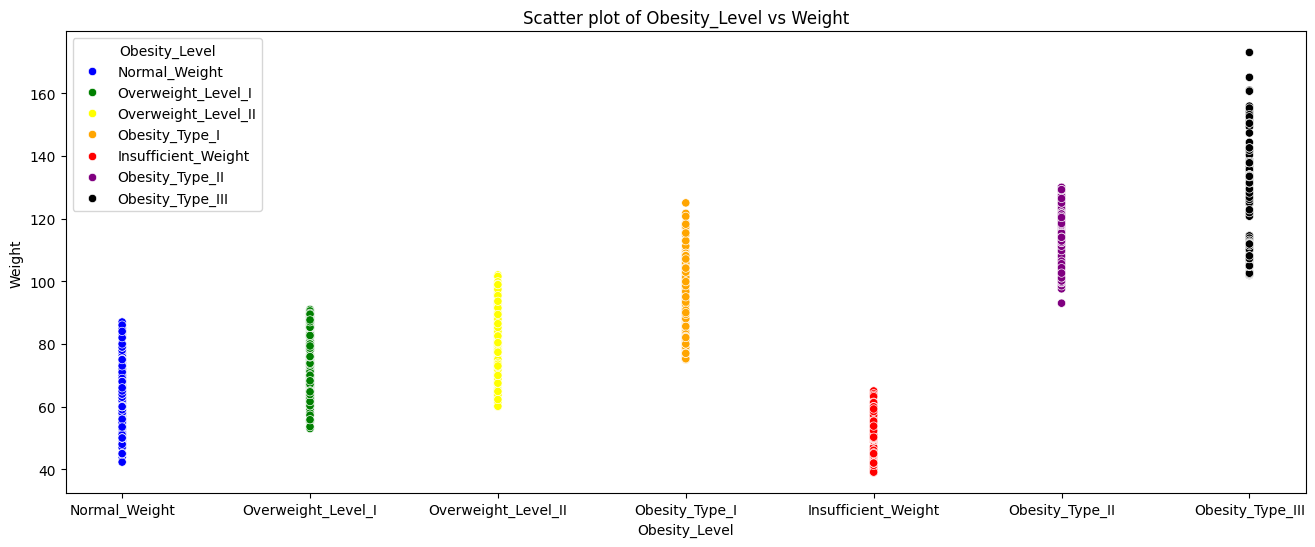

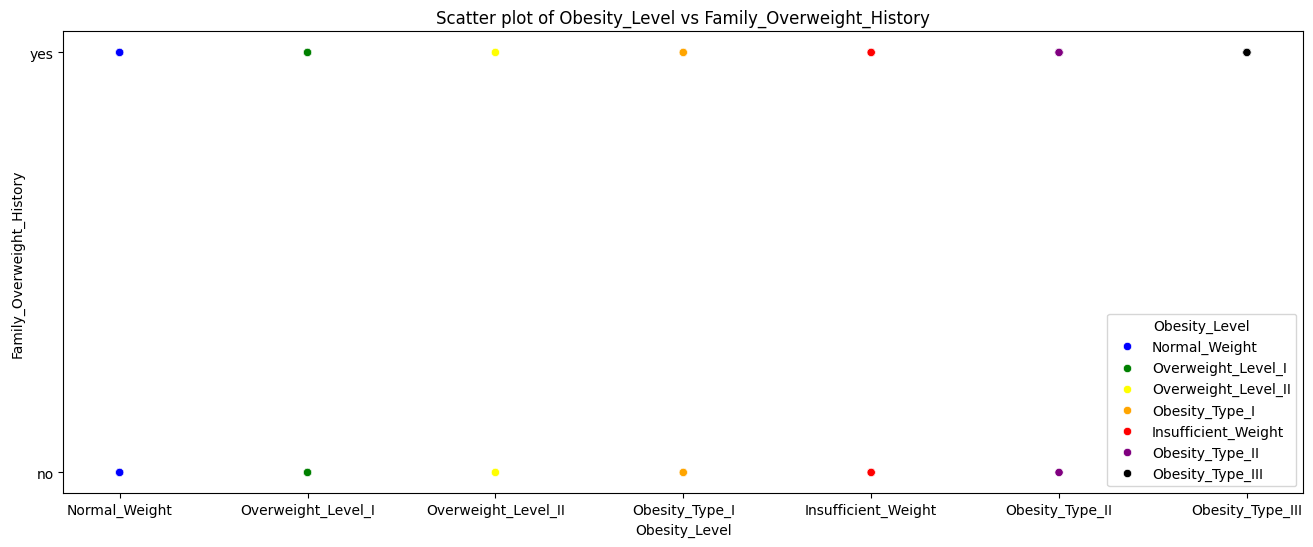

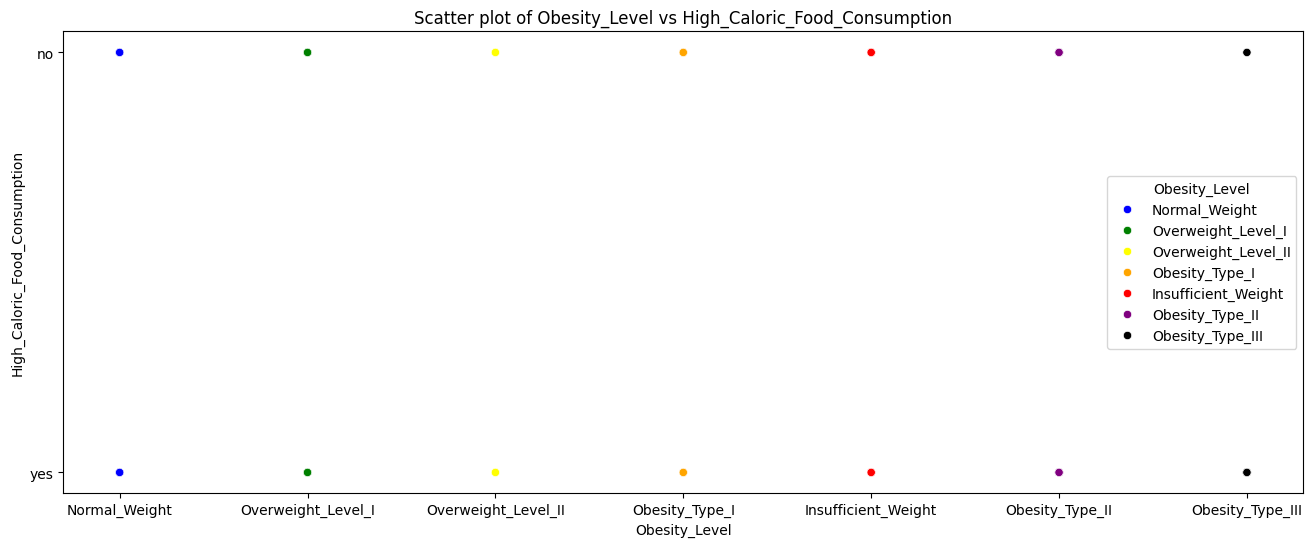

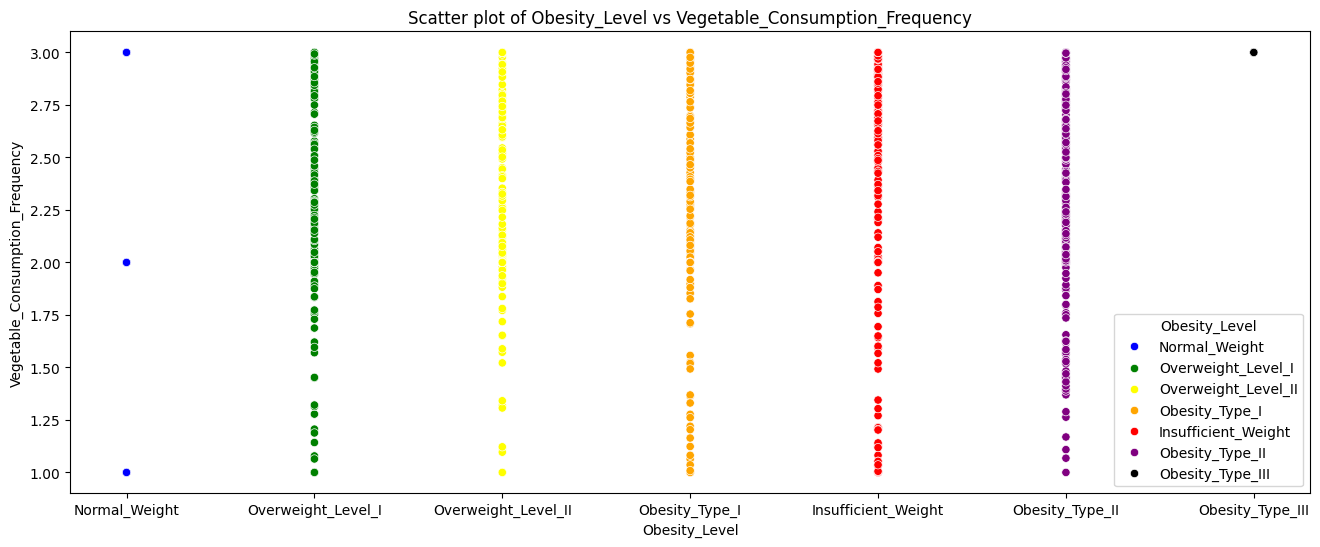

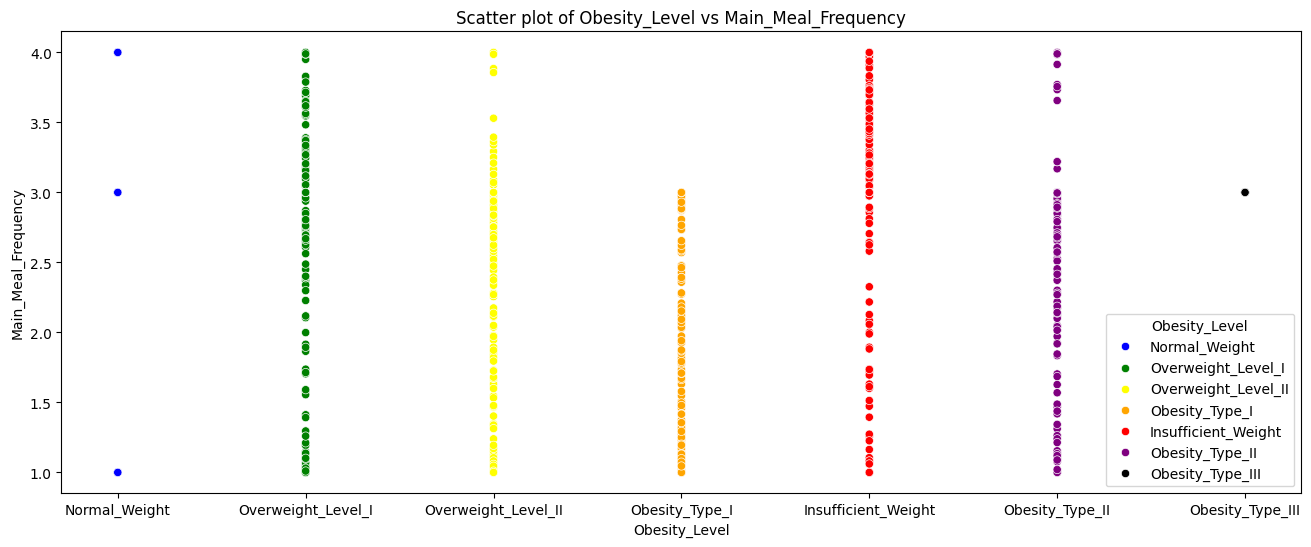

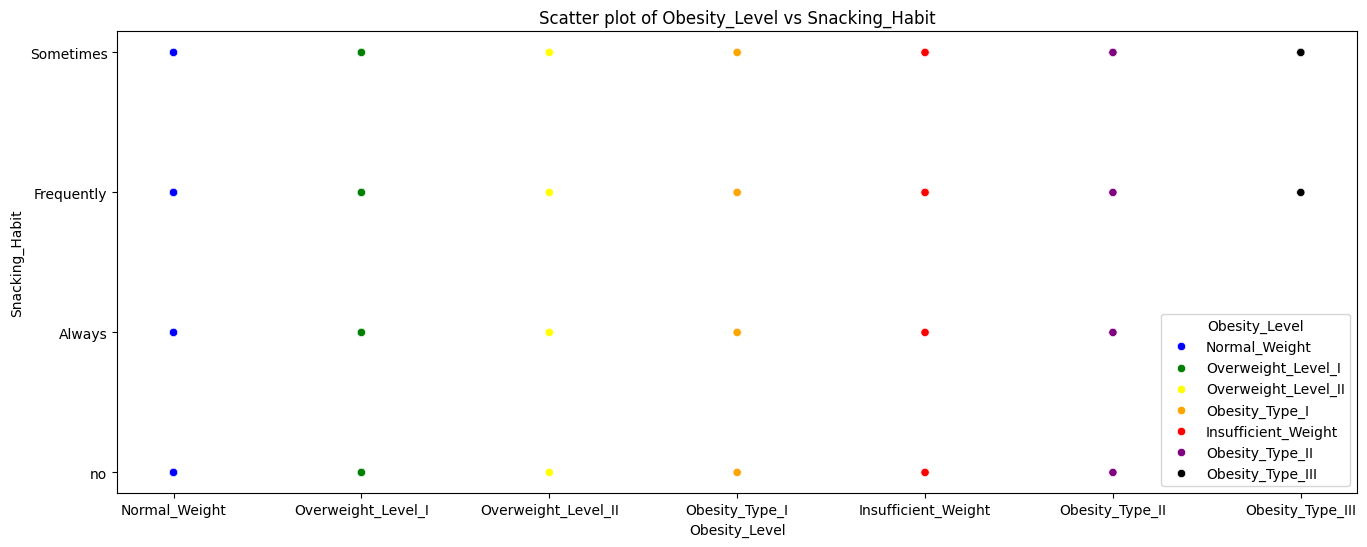

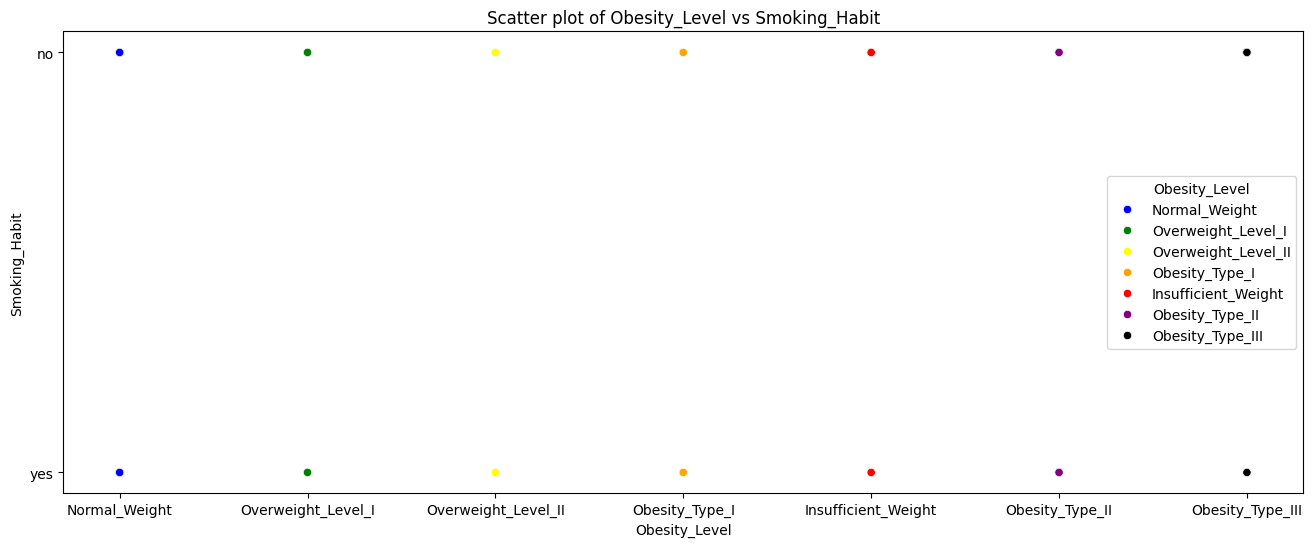

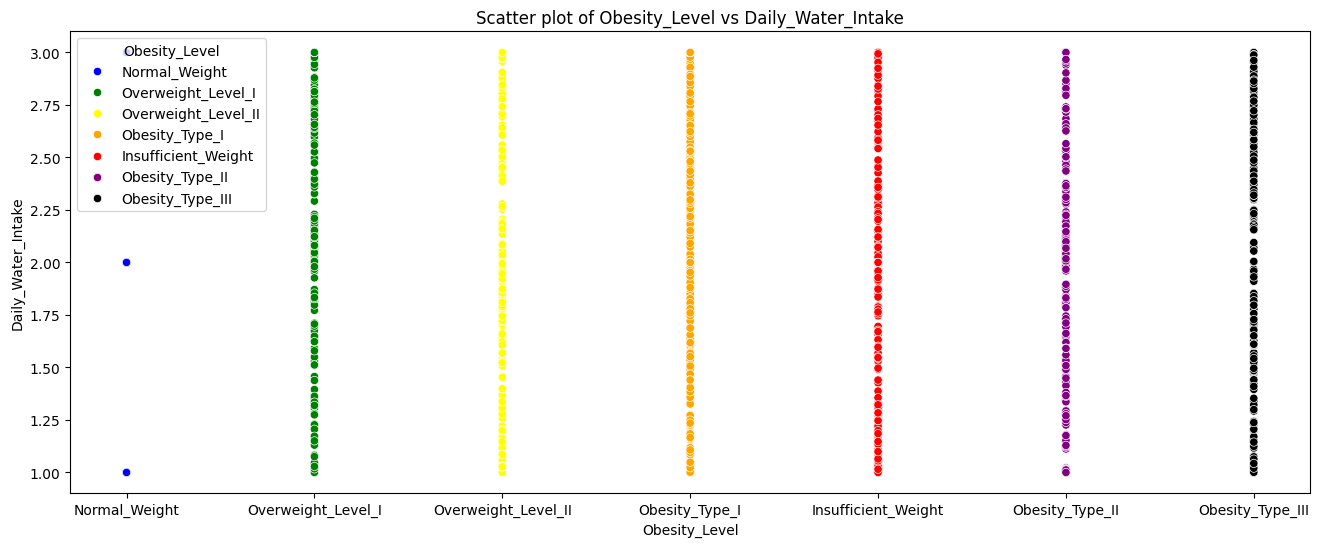

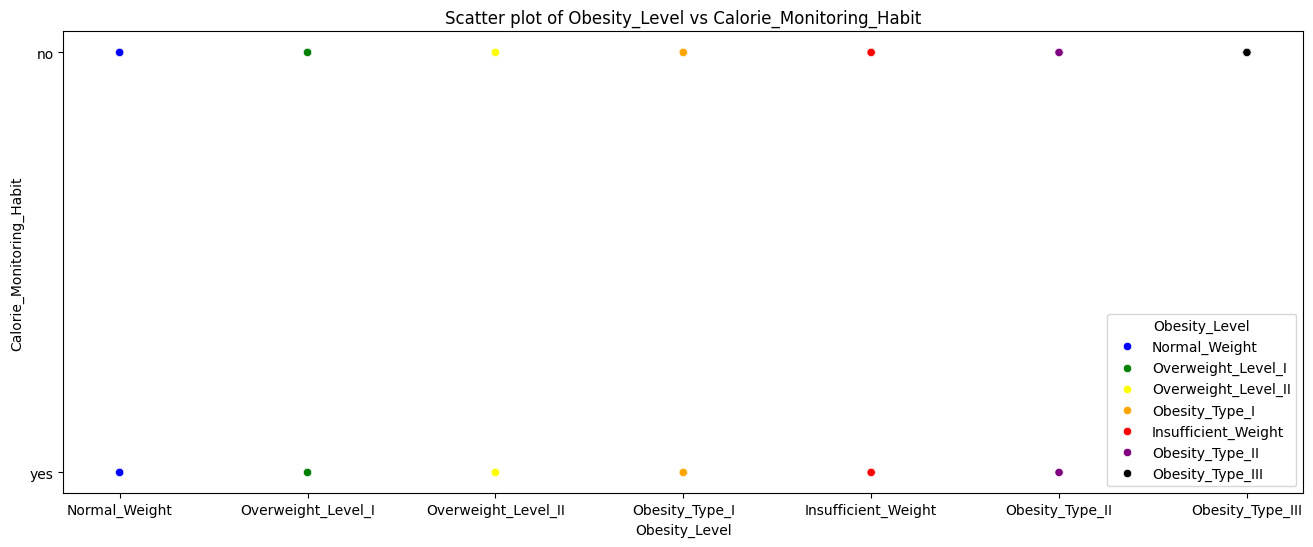

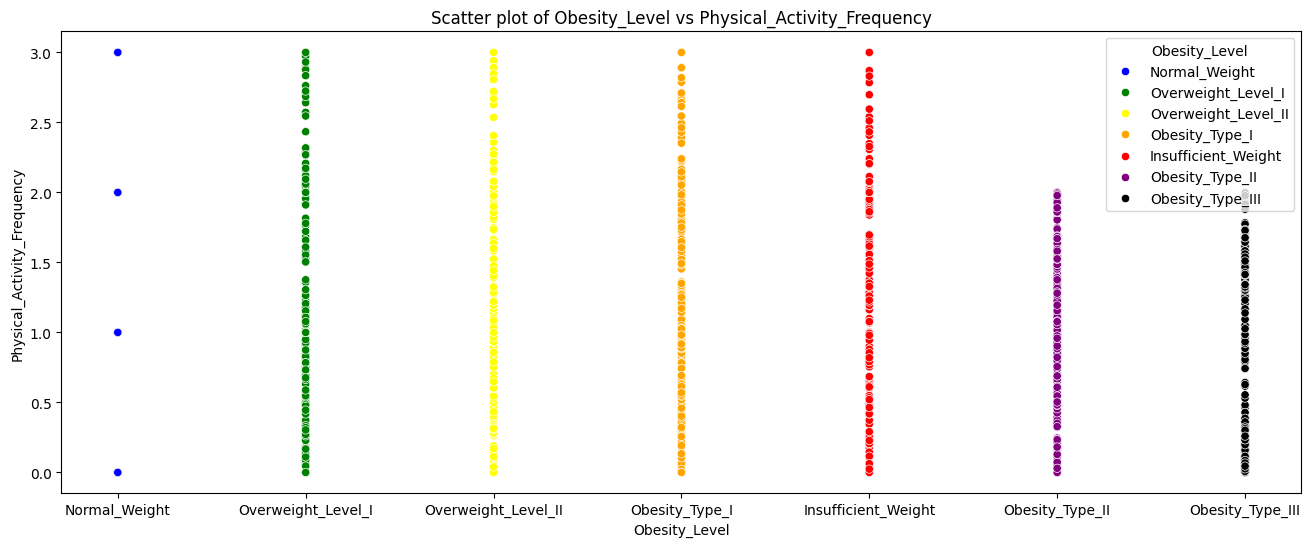

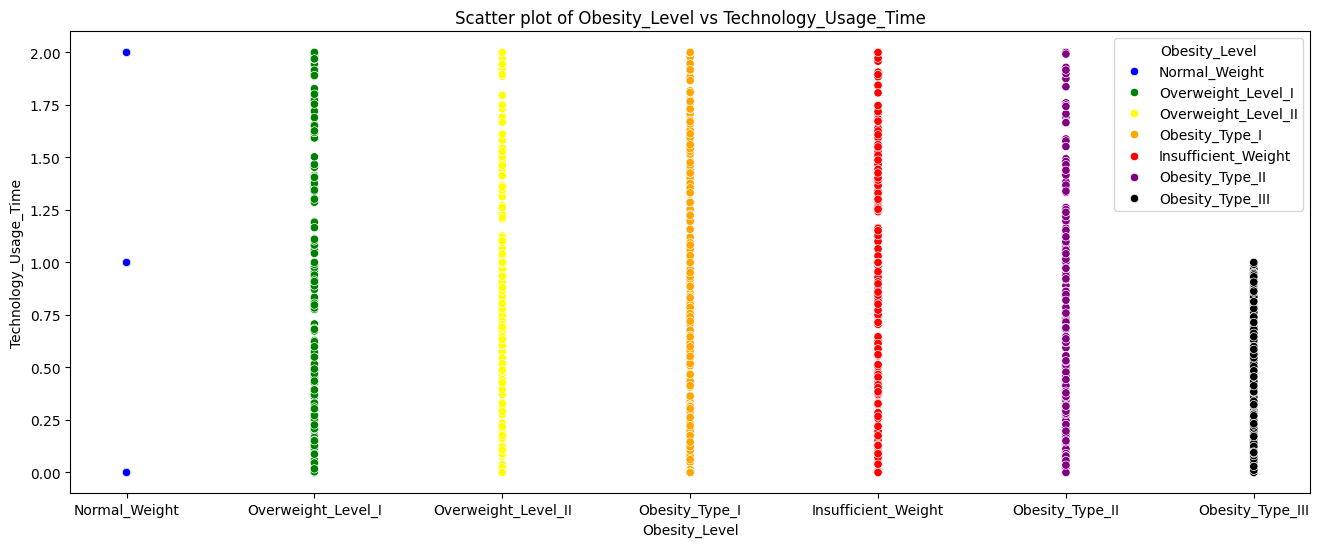

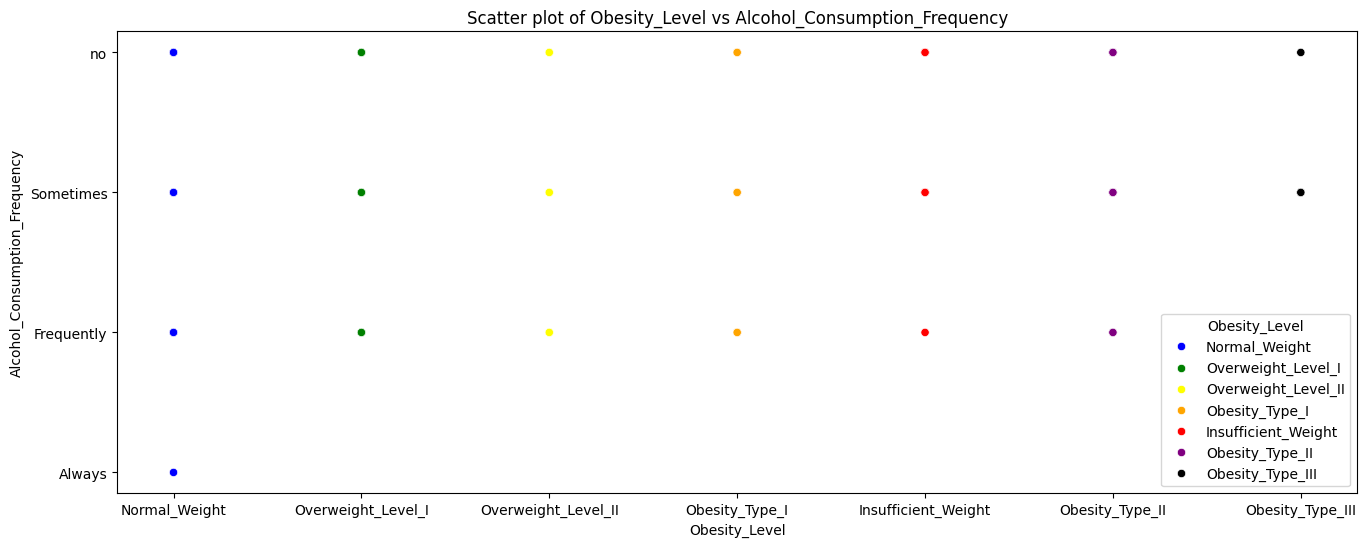

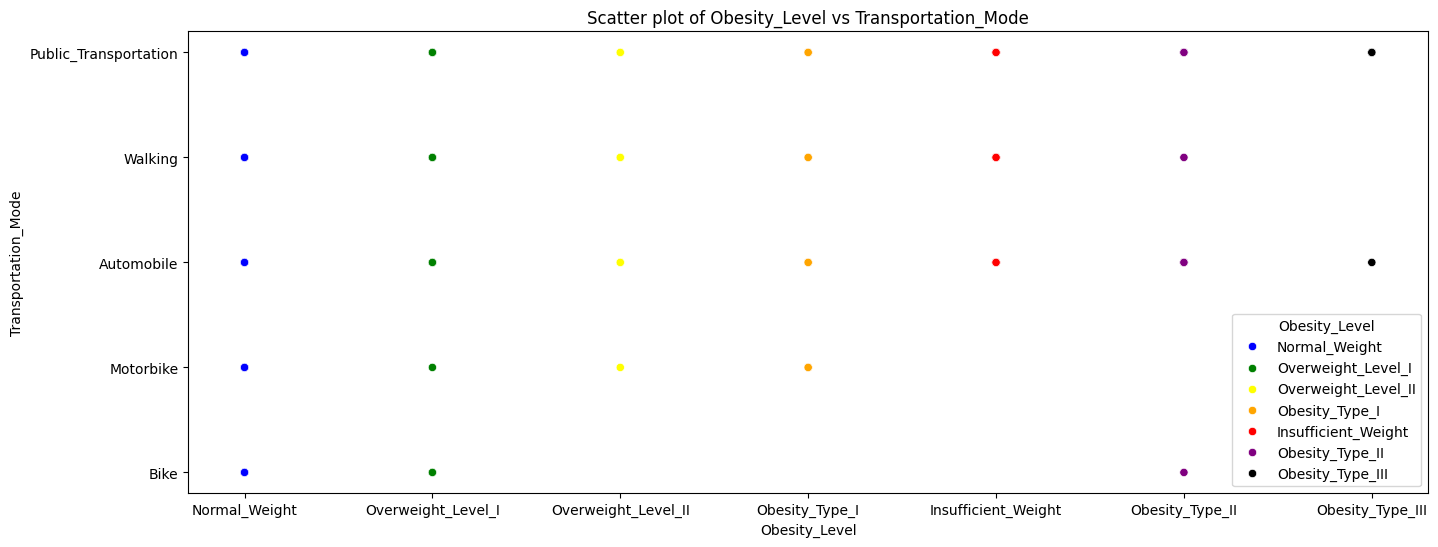

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of column names excluding 'Obesity_Level'
columns = [
    "Gender",
    "Age",
    "Height",
    "Weight",
    "Family_Overweight_History",
    "High_Caloric_Food_Consumption",
    "Vegetable_Consumption_Frequency",
    "Main_Meal_Frequency",
    "Snacking_Habit",
    "Smoking_Habit",
    "Daily_Water_Intake",
    "Calorie_Monitoring_Habit",
    "Physical_Activity_Frequency",
    "Technology_Usage_Time",
    "Alcohol_Consumption_Frequency",
    "Transportation_Mode",
]

# Define the color palette
colors = ["blue", "green", "yellow", "orange", "red", "purple", "black"]
levels = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III",
]
palette = sns.color_palette(colors, len(levels))

# Create a scatter plot for each variable with 'Obesity_Level'
for column in columns:
    plt.figure(figsize=(16, 6))
    sns.scatterplot(
        data=df, x="Obesity_Level", y=column, hue="Obesity_Level", palette=palette
    )
    plt.title(f"Scatter plot of Obesity_Level vs {column}")
    plt.show()

In [5]:
# Remove duplicate rows
df = df.drop_duplicates()

# Print the updated DataFrame
df.shape


(2087, 17)

In [6]:
# List of categorical columns to encode
categorical_cols = ['Gender', 'Family_Overweight_History', 'High_Caloric_Food_Consumption', 
                    'Snacking_Habit', 'Smoking_Habit', 'Calorie_Monitoring_Habit',
                    'Alcohol_Consumption_Frequency', 'Transportation_Mode']

# Encode categorical columns
df = pd.get_dummies(df, columns=categorical_cols)

# Print the encoded DataFrame
print(df.head())


    Age  Height  Weight  Vegetable_Consumption_Frequency  Main_Meal_Frequency  \
0  21.0    1.62    64.0                              2.0                  3.0   
1  21.0    1.52    56.0                              3.0                  3.0   
2  23.0    1.80    77.0                              2.0                  3.0   
3  27.0    1.80    87.0                              3.0                  3.0   
4  22.0    1.78    89.8                              2.0                  1.0   

   Daily_Water_Intake  Physical_Activity_Frequency  Technology_Usage_Time  \
0                 2.0                          0.0                    1.0   
1                 3.0                          3.0                    0.0   
2                 2.0                          2.0                    1.0   
3                 2.0                          2.0                    0.0   
4                 2.0                          0.0                    0.0   

         Obesity_Level  Gender_Female  Gender_Male

In [7]:
from sklearn.model_selection import train_test_split

# Separate the real and synthetic data
real_data = df.iloc[:488]
synthetic_data = df.iloc[488:]

# Split the real data into training, validation, and test sets
train_real, test_real = train_test_split(real_data, test_size=0.3, random_state=42)
train_real, val_real = train_test_split(train_real, test_size=0.43, random_state=42)

# Split the synthetic data into training set
train_synthetic=synthetic_data

# Combine the real and synthetic data to create the final training, validation, and test sets
train = pd.concat([train_real, train_synthetic])
val = val_real
test = test_real

# Print the sizes of the training, validation, and test sets
print(f'Training set size: {len(train)}')
print(f'Validation set size: {len(val)}')
print(f'Test set size: {len(test)}')

# train, test=train_test_split(df,test_size=0.07, random_state=42)
# train,val=train_test_split(train,test_size=0.0753, random_state=42)

# print(f'Training set size: {len(train)}')
# print(f'Validation set size: {len(val)}')
# print(f'Test set size: {len(test)}')


Training set size: 1793
Validation set size: 147
Test set size: 147


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier

# Encode the 'Obesity_Level' column
le = LabelEncoder()
train['Obesity_Level'] = le.fit_transform(train['Obesity_Level'])
val['Obesity_Level'] = le.transform(val['Obesity_Level'])
test['Obesity_Level'] = le.transform(test['Obesity_Level'])

# Separate the features and target variable for training, validation, and test sets
X_train = train.drop('Obesity_Level', axis=1)
y_train = train['Obesity_Level']
X_val = val.drop('Obesity_Level', axis=1)
y_val = val['Obesity_Level']
X_test = test.drop('Obesity_Level', axis=1)
y_test = test['Obesity_Level']

# Define the models
models = {
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'Voting': VotingClassifier(estimators=[('xg', XGBClassifier()), ('lgbm', LGBMClassifier())], voting='hard'),
    'CatBoost': CatBoostClassifier(silent=True),
    'GradientBoosting': GradientBoostingClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    val_predictions = model.predict(X_val)
    
    # Calculate the accuracy of the model
    val_accuracy = accuracy_score(y_val, val_predictions)
    
    print(f'{name} Validation Accuracy: {val_accuracy}')
    
    print(f'{name}\n {classification_report(y_val,val_predictions)}')


XGBoost Validation Accuracy: 0.8367346938775511
XGBoost
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.87      0.89      0.88        81
           2       0.92      1.00      0.96        12
           3       0.50      1.00      0.67         1
           4       1.00      0.50      0.67         2
           5       0.71      0.60      0.65        25
           6       0.88      0.82      0.85        17

    accuracy                           0.84       147
   macro avg       0.80      0.81      0.78       147
weighted avg       0.84      0.84      0.83       147

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2080
[LightGBM] [Info] Number of data points in the train set: 1793, number of used features: 28
[LightGBM] [Info] Start training from score -1.966193
[Lig

In [25]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'max_bin': trial.suggest_int('max_bin', 200, 500),
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        # 'num_iterations': trial.suggest_int('num_iterations', 100, 500),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    model = LGBMClassifier(verbose=-1, **params)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    accuracy = accuracy_score(y_val, preds)

    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Get the best 100 trials
best_100_trials = sorted(study.trials, key=lambda trial: trial.value, reverse=True)[:100]

# Test the best 100 trials on the test set
# Initialize an empty list to store the best models
best_models = []
models_and_accuracies = []

# Test the best 100 trials on the test set
for i, trial in enumerate(best_100_trials):
    model = LGBMClassifier(verbose=-1, **trial.params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    print(f'Trial {i+1} Test Accuracy: {accuracy}')

    # Store the model and its test accuracy
    models_and_accuracies.append((model, accuracy))

# Sort the models based on their test accuracies
models_and_accuracies.sort(key=lambda x: x[1], reverse=True)

# Get the 5 best models
best_models = [model for model, accuracy in models_and_accuracies[:5]]

[I 2024-01-13 19:47:52,739] A new study created in memory with name: no-name-fe8965ce-f83a-4bd6-b0e8-890888046147
[I 2024-01-13 19:47:52,847] Trial 0 finished with value: 0.5782312925170068 and parameters: {'num_leaves': 56, 'max_bin': 438, 'learning_rate': 0.054924928505066035, 'lambda_l1': 7.758031528951421, 'lambda_l2': 5.202289466322137e-05, 'feature_fraction': 0.685962721195948, 'bagging_fraction': 0.5117796087289923, 'bagging_freq': 7, 'min_child_samples': 57}. Best is trial 0 with value: 0.5782312925170068.
[I 2024-01-13 19:47:53,121] Trial 1 finished with value: 0.8027210884353742 and parameters: {'num_leaves': 27, 'max_bin': 351, 'learning_rate': 0.029133233733782488, 'lambda_l1': 7.527690638966055e-08, 'lambda_l2': 1.9842180812329703e-06, 'feature_fraction': 0.8748172153550322, 'bagging_fraction': 0.6279096193426443, 'bagging_freq': 1, 'min_child_samples': 43}. Best is trial 1 with value: 0.8027210884353742.
[I 2024-01-13 19:47:53,257] Trial 2 finished with value: 0.755102040

Trial 1 Test Accuracy: 0.8639455782312925
Trial 2 Test Accuracy: 0.8639455782312925
Trial 3 Test Accuracy: 0.8707482993197279
Trial 4 Test Accuracy: 0.8503401360544217
Trial 5 Test Accuracy: 0.8775510204081632
Trial 6 Test Accuracy: 0.8571428571428571
Trial 7 Test Accuracy: 0.8843537414965986
Trial 8 Test Accuracy: 0.8775510204081632
Trial 9 Test Accuracy: 0.8503401360544217
Trial 10 Test Accuracy: 0.8707482993197279
Trial 11 Test Accuracy: 0.8435374149659864
Trial 12 Test Accuracy: 0.8775510204081632
Trial 13 Test Accuracy: 0.8299319727891157
Trial 14 Test Accuracy: 0.8775510204081632
Trial 15 Test Accuracy: 0.8775510204081632
Trial 16 Test Accuracy: 0.8979591836734694
Trial 17 Test Accuracy: 0.8571428571428571
Trial 18 Test Accuracy: 0.8639455782312925
Trial 19 Test Accuracy: 0.8571428571428571
Trial 20 Test Accuracy: 0.8707482993197279
Trial 21 Test Accuracy: 0.891156462585034
Trial 22 Test Accuracy: 0.8843537414965986
Trial 23 Test Accuracy: 0.8775510204081632
Trial 24 Test Accurac

In [26]:
for m in best_models:
    vpreds=m.predict(X_val)
    tpreds=m.predict(X_test)
    print(classification_report(vpreds,y_val))
    print(classification_report(tpreds, y_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.96      0.90      0.93        87
           2       1.00      1.00      1.00        12
           3       1.00      0.50      0.67         2
           4       0.50      1.00      0.67         1
           5       0.72      0.90      0.80        20
           6       0.94      1.00      0.97        16

    accuracy                           0.91       147
   macro avg       0.86      0.88      0.85       147
weighted avg       0.92      0.91      0.91       147

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.92      0.95      0.94        85
           2       0.93      0.88      0.90        16
           3       0.50      1.00      0.67         2
           4       1.00      1.00      1.00         1
           5       0.70      0.54      0.61        13
           6       0.95 

In [27]:
from sklearn.metrics import confusion_matrix
import numpy as np

models = best_models
model_names = [1,2,3,4,5]

# Get the predictions from each model on the validation set
preds = [model.predict(X_val) for model in models]

# Calculate Disagreement Measure and Correlation of Errors
for i in range(len(models)):
    for j in range(i+1, len(models)):
        # Disagreement Measure
        disagree = np.mean(preds[i] != preds[j])
        print(f'Disagreement Measure between {model_names[i]} and {model_names[j]}: {disagree}')
        
        # Correlation of Errors
        errors_i = preds[i] != y_val
        errors_j = preds[j] != y_val
        correlation = np.corrcoef(errors_i, errors_j)[0, 1]
        print(f'Correlation of Errors between {model_names[i]} and {model_names[j]}: {correlation}')


Disagreement Measure between 1 and 2: 0.027210884353741496
Correlation of Errors between 1 and 2: 0.8312284730195176
Disagreement Measure between 1 and 3: 0.04081632653061224
Correlation of Errors between 1 and 3: 0.7468427095292762
Disagreement Measure between 1 and 4: 0.047619047619047616
Correlation of Errors between 1 and 4: 0.7151579146952368
Disagreement Measure between 1 and 5: 0.06802721088435375
Correlation of Errors between 1 and 5: 0.6335366309528446
Disagreement Measure between 2 and 3: 0.02040816326530612
Correlation of Errors between 2 and 3: 0.9156142365097588
Disagreement Measure between 2 and 4: 0.027210884353741496
Correlation of Errors between 2 and 4: 0.8784004821800202
Disagreement Measure between 2 and 5: 0.05442176870748299
Correlation of Errors between 2 and 5: 0.715157914695236
Disagreement Measure between 3 and 4: 0.006802721088435374
Correlation of Errors between 3 and 4: 0.960021765922412
Disagreement Measure between 3 and 5: 0.061224489795918366
Correlation

In [16]:
import pickle
pickle.dump(best_models[1],open("LGBM1.pkl", 'wb'))
pickle.dump(best_models[4],open("LGBM2.pkl", 'wb'))
lgbm1=pickle.load(open("LGBM1.pkl", 'rb'))
lgbm2=pickle.load(open("LGBM2.pkl", 'rb'))


In [28]:
import optuna
from sklearn.metrics import accuracy_score

def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'max_bin': trial.suggest_int('max_bin', 200, 500),
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'num_iterations': trial.suggest_int('num_iterations', 100, 500),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    model = XGBClassifier(verbosity=0, **params)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    accuracy = accuracy_score(y_val, preds)

    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Get the best 100 trials
best_100_trials = sorted(study.trials, key=lambda trial: trial.value, reverse=True)[:100]

# Test the best 100 trials on the test set
# Initialize an empty list to store the best models
best_models = []
models_and_accuracies = []

# Test the best 100 trials on the test set
for i, trial in enumerate(best_100_trials):
    model = XGBClassifier(verbosity=0, **trial.params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    print(f'Trial {i+1} Test Accuracy: {accuracy}')

    # Store the model and its test accuracy
    models_and_accuracies.append((model, accuracy))

# Sort the models based on their test accuracies
models_and_accuracies.sort(key=lambda x: x[1], reverse=True)

# Get the 5 best models
best_models = [model for model, accuracy in models_and_accuracies[:5]]

[I 2024-01-13 20:06:03,788] A new study created in memory with name: no-name-45f2869a-b173-4426-909a-895247410b86
[I 2024-01-13 20:06:04,611] Trial 0 finished with value: 0.7414965986394558 and parameters: {'num_leaves': 215, 'max_bin': 448, 'learning_rate': 0.02074234343949022, 'num_iterations': 472, 'lambda_l1': 7.175152310318175e-07, 'lambda_l2': 5.980812904274533e-08, 'feature_fraction': 0.5742228414599775, 'bagging_fraction': 0.9031546947075183, 'bagging_freq': 2, 'min_child_samples': 11}. Best is trial 0 with value: 0.7414965986394558.
[I 2024-01-13 20:06:05,349] Trial 1 finished with value: 0.7619047619047619 and parameters: {'num_leaves': 106, 'max_bin': 288, 'learning_rate': 0.01968816154356815, 'num_iterations': 483, 'lambda_l1': 0.8043042342246084, 'lambda_l2': 8.518789352191909e-07, 'feature_fraction': 0.9812621141014412, 'bagging_fraction': 0.746460517540567, 'bagging_freq': 6, 'min_child_samples': 14}. Best is trial 1 with value: 0.7619047619047619.
[I 2024-01-13 20:06:06

Trial 1 Test Accuracy: 0.8095238095238095
Trial 2 Test Accuracy: 0.8367346938775511
Trial 3 Test Accuracy: 0.8231292517006803
Trial 4 Test Accuracy: 0.8367346938775511
Trial 5 Test Accuracy: 0.8299319727891157
Trial 6 Test Accuracy: 0.8367346938775511
Trial 7 Test Accuracy: 0.8299319727891157
Trial 8 Test Accuracy: 0.8231292517006803
Trial 9 Test Accuracy: 0.8299319727891157
Trial 10 Test Accuracy: 0.8367346938775511
Trial 11 Test Accuracy: 0.8435374149659864
Trial 12 Test Accuracy: 0.8299319727891157
Trial 13 Test Accuracy: 0.8163265306122449
Trial 14 Test Accuracy: 0.8299319727891157
Trial 15 Test Accuracy: 0.8367346938775511
Trial 16 Test Accuracy: 0.8299319727891157
Trial 17 Test Accuracy: 0.8435374149659864
Trial 18 Test Accuracy: 0.8299319727891157
Trial 19 Test Accuracy: 0.8435374149659864
Trial 20 Test Accuracy: 0.8367346938775511
Trial 21 Test Accuracy: 0.8231292517006803
Trial 22 Test Accuracy: 0.8367346938775511
Trial 23 Test Accuracy: 0.8231292517006803
Trial 24 Test Accura

In [29]:
best_models

[XGBClassifier(bagging_fraction=0.8298052180862892, bagging_freq=6,
               base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None,
               feature_fraction=0.7414597484041388, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, lambda_l1=0.6982330753798365,
               lambda_l2=4.778352062016914e-07,
               learning_rate=0.08027341207954188, max_bin=439,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_samples=92, min_child_weight=None, missing=nan, ...),
 XGBClassifier(bagging_fraction=0.9113408814899533, bagging_freq=1,
               base_score=None, booster=None, callbacks=None,
    

In [30]:
for m in best_models:
    vpreds=m.predict(X_val)
    tpreds=m.predict(X_test)
    print(classification_report(vpreds,y_val))
    print(classification_report(tpreds, y_test))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.90      0.87      0.88        84
           2       1.00      1.00      1.00        12
           3       1.00      0.50      0.67         2
           4       0.50      1.00      0.67         1
           5       0.64      0.73      0.68        22
           6       0.88      0.94      0.91        16

    accuracy                           0.86       147
   macro avg       0.83      0.83      0.81       147
weighted avg       0.87      0.86      0.86       147

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.85      0.95      0.90        79
           2       0.93      0.88      0.90        16
           3       0.50      1.00      0.67         2
           4       1.00      1.00      1.00         1
           5       0.80      0.42      0.55        19
           6       0.86 

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.84      0.95      0.89        78
           2       0.93      0.88      0.90        16
           3       0.50      1.00      0.67         2
           4       1.00      0.50      0.67         2
           5       0.80      0.38      0.52        21
           6       0.86      1.00      0.93        19

    accuracy                           0.84       147
   macro avg       0.83      0.77      0.76       147
weighted avg       0.85      0.84      0.83       147

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.91      0.87      0.89        85
           2       1.00      1.00      1.00        12
           3       1.00      0.50      0.67         2
           4       0.50      1.00      0.67         1
           5       0.60      0.68      0.64        22
           6       0.88 

In [31]:
from sklearn.metrics import confusion_matrix
import numpy as np

models = best_models
model_names = [1,2,3,4,5]

# Get the predictions from each model on the validation set
preds = [model.predict(X_val) for model in models]

# Calculate Disagreement Measure and Correlation of Errors
for i in range(len(models)):
    for j in range(i+1, len(models)):
        # Disagreement Measure
        disagree = np.mean(preds[i] != preds[j])
        print(f'Disagreement Measure between {model_names[i]} and {model_names[j]}: {disagree}')
        
        # Correlation of Errors
        errors_i = preds[i] != y_val
        errors_j = preds[j] != y_val
        correlation = np.corrcoef(errors_i, errors_j)[0, 1]
        print(f'Correlation of Errors between {model_names[i]} and {model_names[j]}: {correlation}')


Disagreement Measure between 1 and 2: 0.02040816326530612
Correlation of Errors between 1 and 2: 0.9153474162242756
Disagreement Measure between 1 and 3: 0.02040816326530612
Correlation of Errors between 1 and 3: 0.9153474162242756
Disagreement Measure between 1 and 4: 0.027210884353741496
Correlation of Errors between 1 and 4: 0.9153474162242756
Disagreement Measure between 1 and 5: 0.027210884353741496
Correlation of Errors between 1 and 5: 0.8888888888888911
Disagreement Measure between 2 and 3: 0.013605442176870748
Correlation of Errors between 2 and 3: 0.9421259842519695
Disagreement Measure between 2 and 4: 0.006802721088435374
Correlation of Errors between 2 and 4: 1.0
Disagreement Measure between 2 and 5: 0.006802721088435374
Correlation of Errors between 2 and 5: 0.9720503535125047
Disagreement Measure between 3 and 4: 0.02040816326530612
Correlation of Errors between 3 and 4: 0.9421259842519695
Disagreement Measure between 3 and 5: 0.02040816326530612
Correlation of Errors be

In [32]:
import pickle
pickle.dump(best_models[1],open("XGB1.pkl", 'wb'))
pickle.dump(best_models[3],open("XGB2.pkl", 'wb'))
xgb1=pickle.load(open("XGB1.pkl", 'rb'))
xgb2=pickle.load(open("XGB2.pkl", 'rb'))

In [44]:
v = VotingClassifier(
    estimators=[
        ("xg1", XGBClassifier(**xgb1.get_params())),
        ("lgbm1", LGBMClassifier(verbose=-1, **lgbm1.get_params())),
        ("xg2", XGBClassifier(**xgb2.get_params())),
        ("lgbm2", LGBMClassifier(verbose=-1, **lgbm2.get_params())),
    ],
    voting="soft",
)
v.fit(X_train, y_train)
preds = v.predict(X_test)
print(classification_report(y_test, preds))
preds = v.predict(X_val)
print(classification_report(y_val, preds))

/home/himanshu/.local/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/himanshu/.local/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.95      0.92      0.94        88
           2       0.88      0.93      0.90        15
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         1
           5       0.54      0.70      0.61        10
           6       1.00      0.95      0.98        22

    accuracy                           0.90       147
   macro avg       0.86      0.84      0.83       147
weighted avg       0.91      0.90      0.90       147

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.90      0.98      0.93        81
           2       1.00      1.00      1.00        12
           3       0.50      1.00      0.67         1
           4       1.00      0.50      0.67         2
           5       0.94      0.68      0.79        25
           6       0.94 